### Extrapolation

Extrapolation is a statistical technique aimed at inferring the unknown from the known. It attempts to predict future data by relying on historical data, such as estimating the size of a population a few years in the future on the basis of the current population size and its rate of growth.

Extrapolation may be valid where the present circumstances give no indication of any interruption in long-established past trends. However, a straight-line extrapolation (assuming a short-term trend is to continue far into the future) is fraught with risk because some unforeseeable factors almost always intervene.

https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Extrapolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# Make the dataset
# Sine wave in 2D

N = 1000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

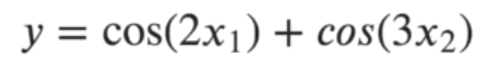

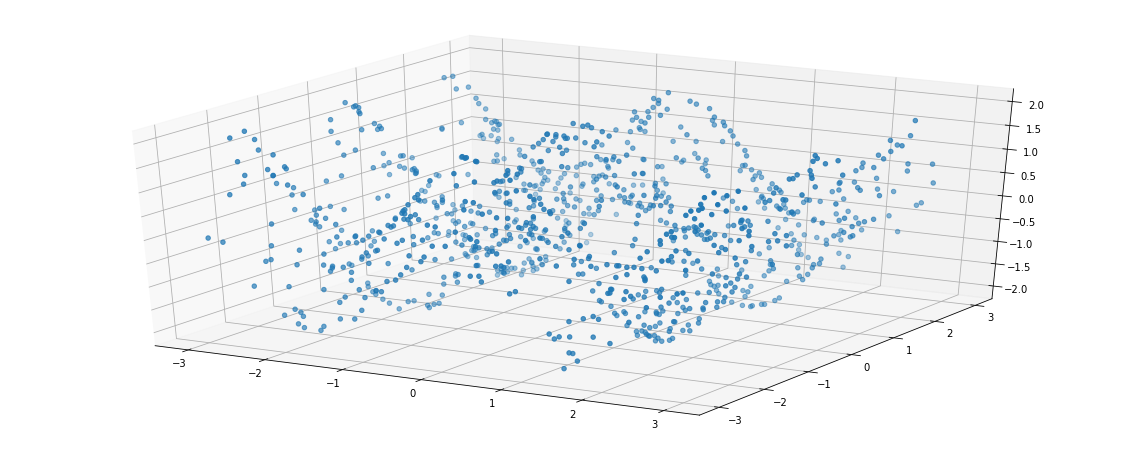

In [3]:
fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y);

### SVR

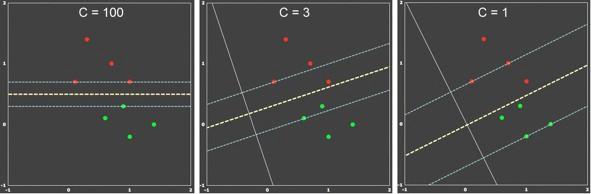
*   Large Value of parameter C => small margin
*  Small Value of paramerter C => Large margin

There is no rule of thumb to choose a C value, it totally depends on your testing data. The only option to is try bunch of different values and choose the value which gives you lowest misclassification rate on testing data.

https://medium.com/@pushkarmandot/what-is-the-significance-of-c-value-in-support-vector-machine-28224e852c5a

In [4]:
# SVR
# C = regularization penalty

model = SVR(C = 100.)
model.fit(X, Y);

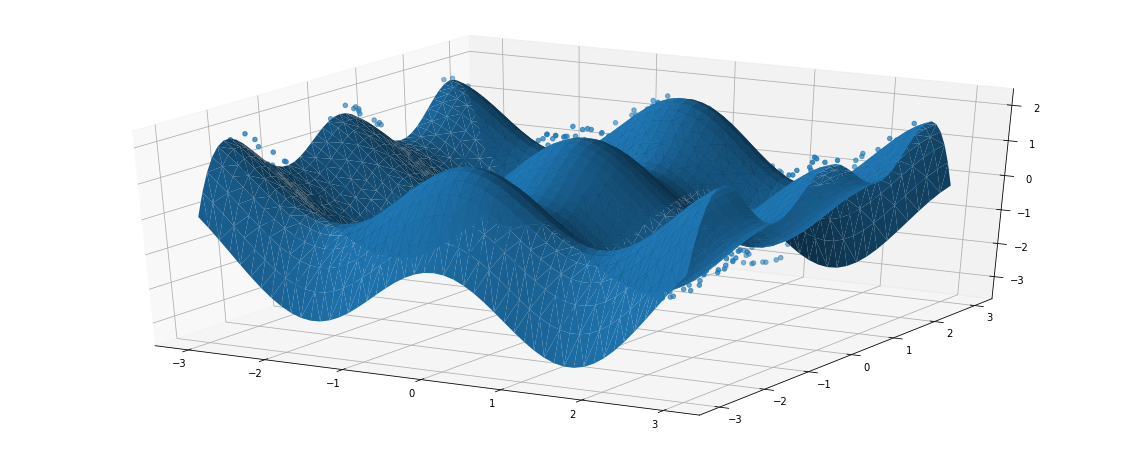

In [5]:
# Plot prediction surface

fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y);

# Surface plot

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

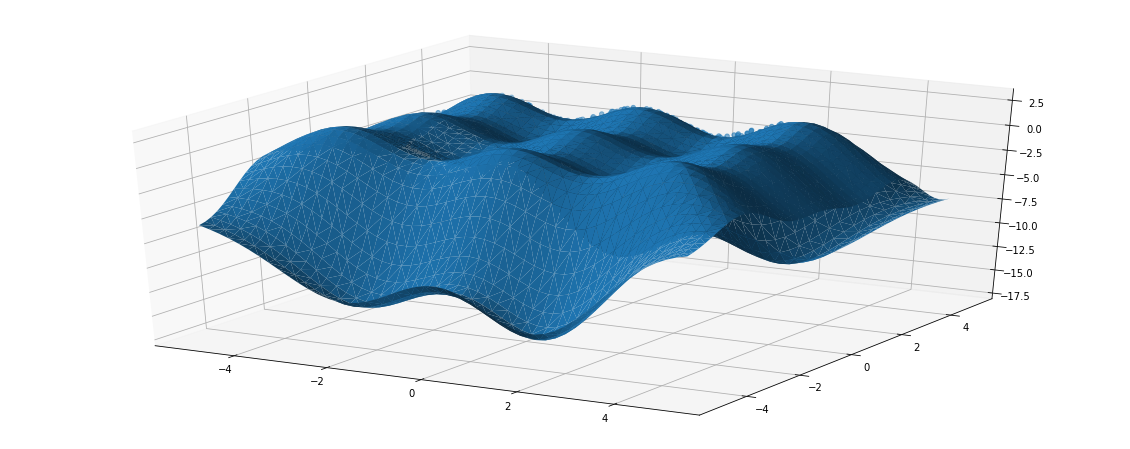

In [6]:
# Plot it again with increased value range
# Plot prediction surface

fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y);

# Surface plot

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

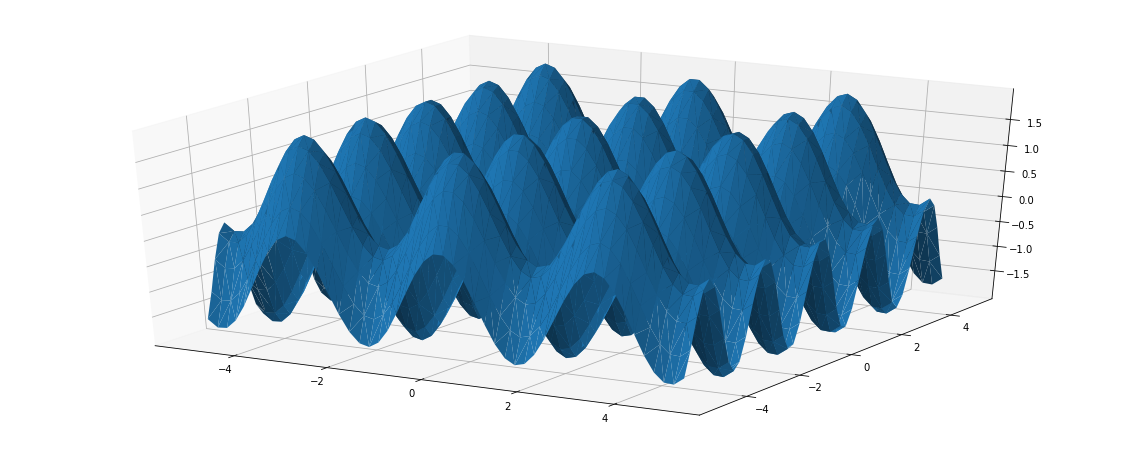

In [8]:
# Plot it again using true function

fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection = '3d')
# ax.scatter(X[:,0], X[:,1], Y);

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1]) # True function 
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Ytrue, linewidth = 0.2, antialiased = True);

### Random Forest

In [9]:
model = RandomForestRegressor()
model.fit(X, Y);

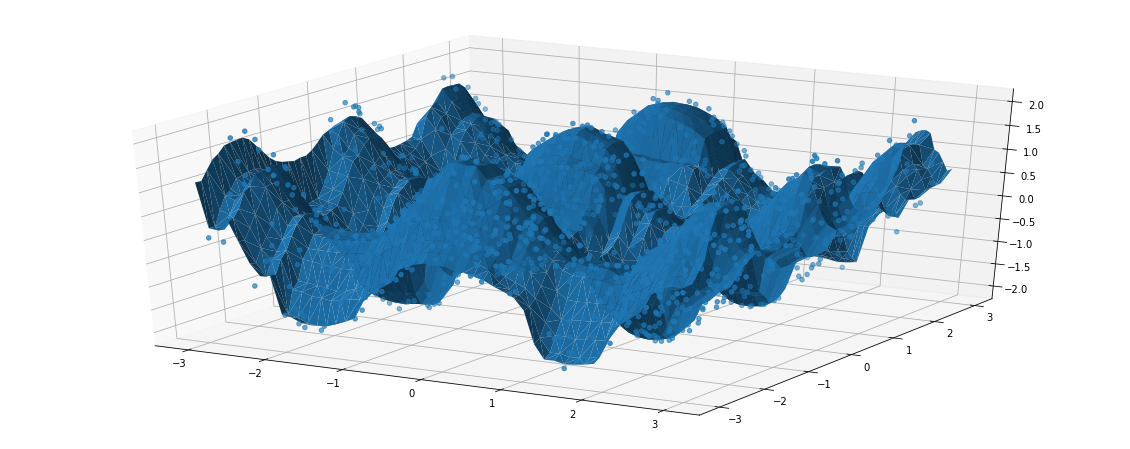

In [10]:
# Plot prediction surface

fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y);

# Surface plot

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

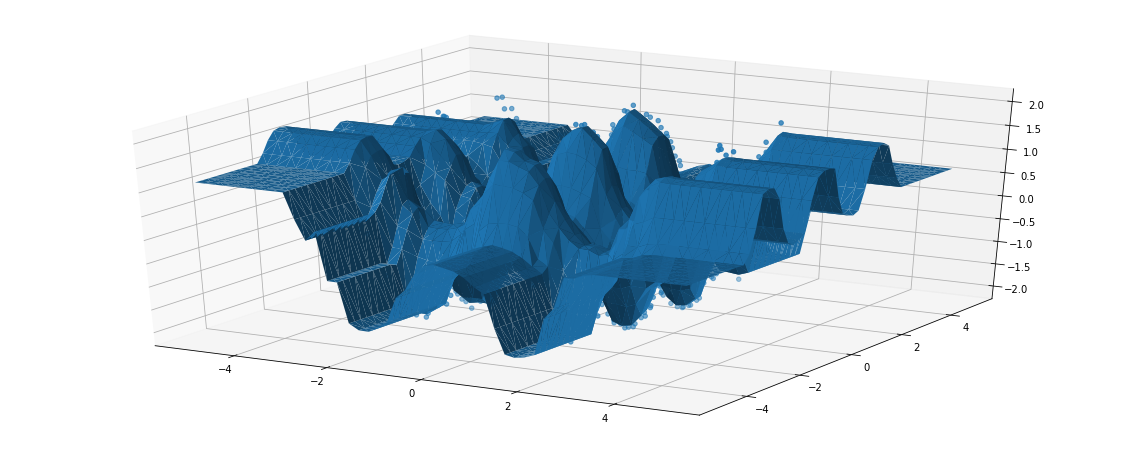

In [11]:
# Plot it again with increased value range
# Plot prediction surface

fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y);

# Surface plot

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

### MLP Regressor

In [12]:
model = MLPRegressor(hidden_layer_sizes = 128, alpha = 0, learning_rate_init = 0.01)
model.fit(X, Y);

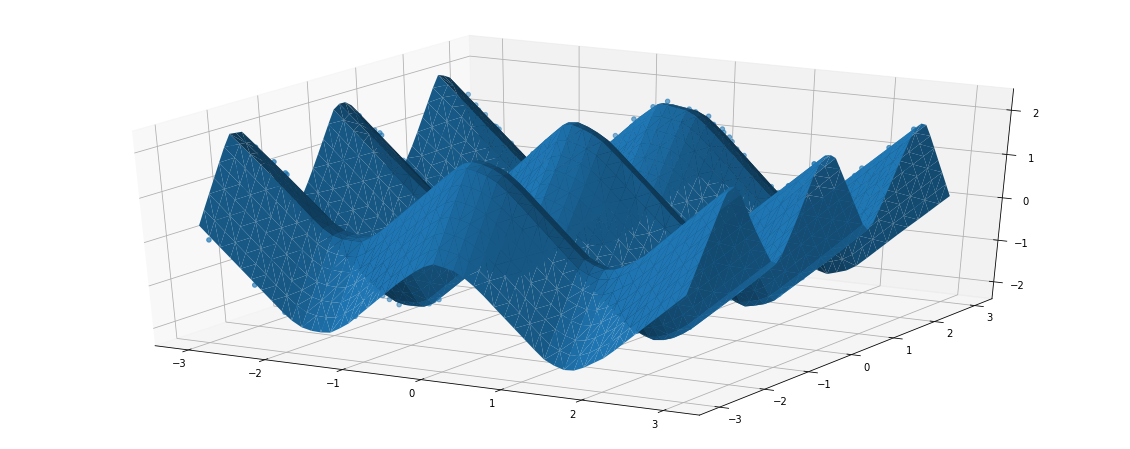

In [13]:
# Plot prediction surface

fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y);

# Surface plot

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

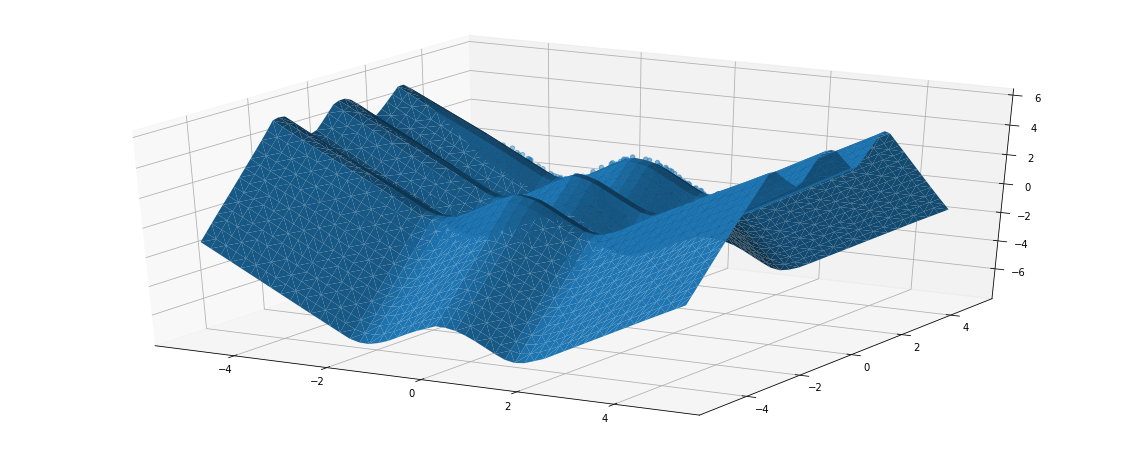

In [14]:
# Plot it again with increased value range
# Plot prediction surface

fig = plt.figure(figsize = (20, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y);

# Surface plot

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = 0.2, antialiased = True);

### Stock Price

In [15]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2022-01-07 06:52:21--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K   723KB/s    in 0.3s    

2022-01-07 06:52:22 (723 KB/s) - ‘SPY.csv’ saved [251935/251935]



In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('SPY.csv', index_col = 'Date', parse_dates = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [18]:
df.shape

(2263, 6)

In [19]:
train = df.iloc[:2000]['Close'].to_numpy()
test = df.iloc[2000:]['Close'].to_numpy()

In [20]:
# Create pretend inputs of auto regressive models with two lags

Xtrain = []
for t in range(len(train) - 1):
  x0 = train[t]
  x1 = train[t + 1]
  Xtrain.append((x0, x1))

Xtest = []
for t in range(len(test) - 1):
  x0 = test[t]
  x1 = test[t + 1]
  Xtest.append((x0, x1))

In [21]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

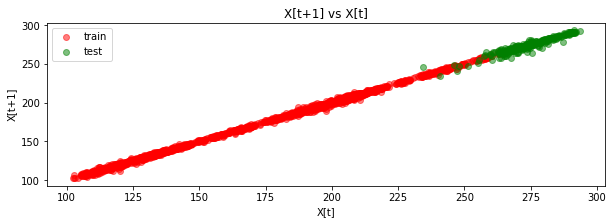

In [24]:
plt.figure(figsize = (10, 3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")
plt.scatter(Xtrain[:,0], Xtrain[:,1], c = 'r', alpha = 0.5, label = 'train')
plt.scatter(Xtest[:,0], Xtest[:,1], c = 'g', alpha = 0.5, label = 'test')
plt.legend();

If you use stock prices as inputs for machine learning model, extrapolation is needed. The model only trained on red range of values while the green range of values is never observed.